## Analiza wstępna

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [96]:
#Wczytanie zbioru z pliku CSV

filename = 'starbucks.csv'
data = pd.read_csv(filename, index_col='Unnamed: 0')

#### Podgląd zbioru

In [97]:
data.head()

item  calories   fat  carb  fiber  protein    type
1                 8-Grain Roll       350   8.0    67      5       10  bakery
2            Apple Bran Muffin       350   9.0    64      7        6  bakery
3                Apple Fritter       420  20.0    59      0        5  bakery
4              Banana Nut Loaf       490  19.0    75      4        7  bakery
5  Birthday Cake Mini Doughnut       130   6.0    17      0        0  bakery

In [127]:
unique_values = data.iloc[:, 6].unique()
print(unique_values)

['bakery' 'bistro box' 'petite' 'hot breakfast' 'salad' 'sandwich'
 'parfait']


In [99]:
data.describe()

calories        fat       carb      fiber    protein
count   77.000000  77.000000  77.000000  77.000000  77.000000
mean   338.831169  13.766234  44.870130   2.220779   9.480519
std    105.368701   7.095488  16.551634   2.112764   8.079556
min     80.000000   0.000000  16.000000   0.000000   0.000000
25%    300.000000   9.000000  31.000000   0.000000   5.000000
50%    350.000000  13.000000  45.000000   2.000000   7.000000
75%    420.000000  18.000000  59.000000   4.000000  15.000000
max    500.000000  28.000000  80.000000   7.000000  34.000000

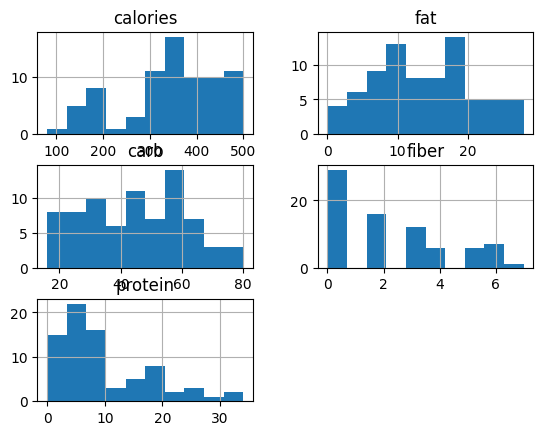

In [100]:
data.hist()
plt.show()

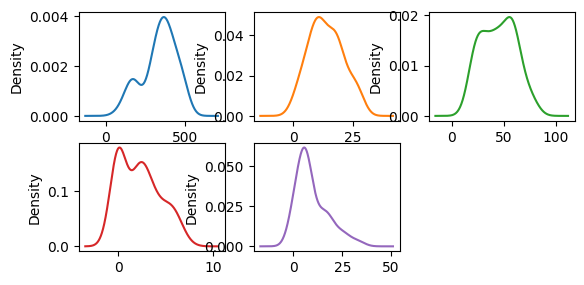

In [101]:
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False, legend=False)
plt.show()

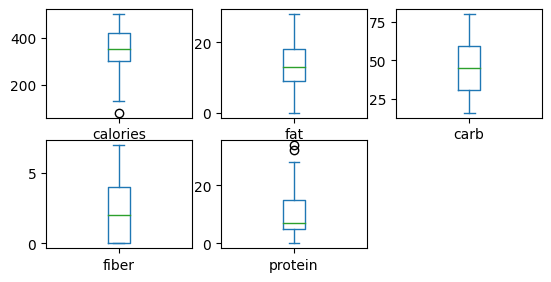

In [102]:
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False)
plt.show()

In [103]:
#kolumny numeryczne
columns=['calories', 'fat', 'carb', 'fiber', 'protein']

In [104]:
data[columns].corr()

calories       fat      carb     fiber   protein
calories  1.000000  0.758682  0.674999  0.260645  0.410398
fat       0.758682  1.000000  0.144547 -0.028549  0.223470
carb      0.674999  0.144547  1.000000  0.213044 -0.050789
fiber     0.260645 -0.028549  0.213044  1.000000  0.488564
protein   0.410398  0.223470 -0.050789  0.488564  1.000000

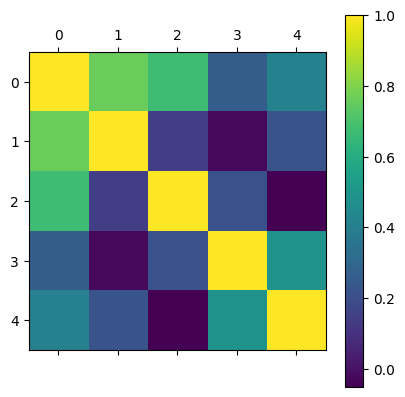

In [105]:
plt.matshow(data[columns].corr())
plt.colorbar()
plt.show()

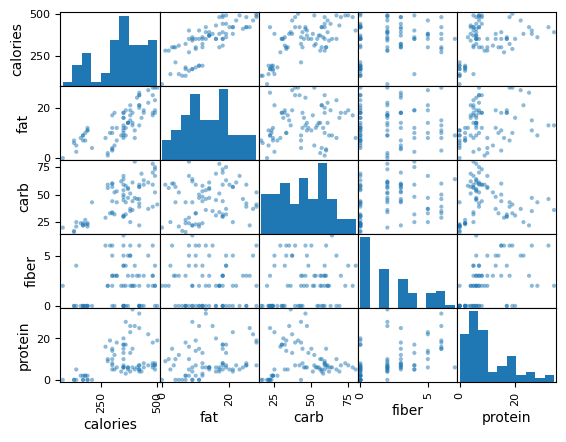

In [106]:
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show()

## Przygotowanie danych

### Skalowanie

In [107]:
X=data.values[:,1:6]
Y=data.values[:,6]

In [108]:
#skalowanie cech
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
X_rescaled=scaler.fit_transform(X)
print(X_rescaled[0:5,:])

[[0.64285714 0.28571429 0.796875   0.71428571 0.29411765]
 [0.64285714 0.32142857 0.75       1.         0.17647059]
 [0.80952381 0.71428571 0.671875   0.         0.14705882]
 [0.97619048 0.67857143 0.921875   0.57142857 0.20588235]
 [0.11904762 0.21428571 0.015625   0.         0.        ]]


In [109]:
#standaryzacja cech
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_rescaled=scaler.fit_transform(X)
print(X_rescaled[0:5,:])

[[ 0.10669269 -0.81799103  1.34578769  1.32406883  0.06471729]
 [ 0.10669269 -0.67613222  1.16334816  2.2769034  -0.43360587]
 [ 0.77538292  0.88431463  0.85928228 -1.05801761 -0.55818666]
 [ 1.44407315  0.74245582  1.8322931   0.84765154 -0.30902508]
 [-1.99490518 -1.10170864 -1.69487111 -1.05801761 -1.18109062]]


In [110]:
#normalizacja wektora cech dla danego przykładu
from sklearn.preprocessing import Normalizer
scaler=Normalizer()
X_rescaled=scaler.fit_transform(X)
print(X_rescaled[0:5,:])

[[0.98143615 0.02243283 0.18787492 0.01402052 0.02804103]
 [0.98304524 0.02527831 0.17975684 0.0196609  0.0168522 ]
 [0.98910911 0.04710043 0.13894628 0.         0.01177511]
 [0.98763228 0.03829595 0.15116821 0.0080623  0.01410903]
 [0.99052111 0.04571636 0.12952968 0.         0.        ]]


### Selekcja cech

In [111]:
#analiza statystyczna
from sklearn.feature_selection import chi2, SelectKBest

selector=SelectKBest(score_func=chi2, k=5)
test=selector.fit(X,Y)
print(test.scores_)
cechy=test.transform(X)
print(cechy[:,0:5])

[1115.24213661   52.80473496  241.12789847   56.40138711  408.59640365]
[[350 8.0 67 5 10]
 [350 9.0 64 7 6]
 [420 20.0 59 0 5]
 [490 19.0 75 4 7]
 [130 6.0 17 0 0]
 [370 14.0 47 5 6]
 [460 22.0 61 2 7]
 [370 14.0 55 0 6]
 [310 18.0 32 0 5]
 [420 25.0 39 0 7]
 [380 17.0 51 2 4]
 [320 12.0 53 3 6]
 [300 17.0 34 2 5]
 [420 21.0 57 2 5]
 [310 5.0 52 3 12]
 [480 18.0 70 3 7]
 [490 18.0 73 2 8]
 [410 24.0 46 3 6]
 [130 7.0 16 0 0]
 [280 2.0 56 2 10]
 [360 12.0 58 0 3]
 [490 23.0 67 0 5]
 [420 25.0 42 0 7]
 [440 18.0 59 3 8]
 [350 13.0 54 0 6]
 [210 4.0 43 0 0]
 [350 16.0 45 2 6]
 [300 3.0 60 6 15]
 [420 21.0 57 0 4]
 [370 14.0 56 3 5]
 [140 5.0 21 0 0]
 [280 1.0 59 2 9]
 [390 14.0 61 2 6]
 [480 17.0 78 2 6]
 [480 25.0 59 3 8]
 [430 16.0 69 0 4]
 [400 8.0 80 4 5]
 [340 9.0 62 2 4]
 [350 10.0 59 4 7]
 [440 19.0 63 0 6]
 [490 28.0 52 2 7]
 [480 28.0 39 6 18]
 [270 8.0 29 6 16]
 [360 19.0 32 4 17]
 [380 15.0 35 6 26]
 [380 19.0 37 5 13]
 [420 26.0 22 3 25]
 [350 11.0 50 6 15]
 [380 21.0 25 5 23

In [142]:
#Recursive Feature Extraction
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

import pandas 
from pandas import read_csv
filename = 'starbucks.csv'
data = pd.read_csv(filename, index_col='Unnamed: 0')
X=data.values[:,1:6]
Y=data.values[:,6]
model=LogisticRegression(max_iter=int(1e6))
rfe=RFE(model, n_features_to_select=5)
test=rfe.fit(X,Y)

print("liczba cech: ", test.n_features_)
print("maska wybranych cech: ", test.support_)
print("ranking cech: ", test.ranking_)

liczba cech:  5
maska wybranych cech:  [ True  True  True  True  True]
ranking cech:  [1 1 1 1 1]


In [113]:
# redukcja wymiarowości
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
test=pca.fit(X)
print("komponenty: ", test.components_)
print("wyjaśniona wariancja: ", test.explained_variance_ratio_)
X_PCA=pca.fit_transform(X);
print(X)
print(X_PCA)

komponenty:  [[-9.92556929e-01 -5.03819054e-02 -1.06336195e-01 -5.20422686e-03
  -3.09505258e-02]
 [ 7.47238935e-02  2.49314488e-01 -9.09772915e-01  8.68500562e-04
   3.23374574e-01]
 [-2.35146990e-02 -4.55330805e-01  1.77903359e-01  1.63675758e-01
   8.56552134e-01]]
wyjaśniona wariancja:  [0.9801737  0.01522375 0.00426738]
[[350 8.0 67 5 10]
 [350 9.0 64 7 6]
 [420 20.0 59 0 5]
 [490 19.0 75 4 7]
 [130 6.0 17 0 0]
 [370 14.0 47 5 6]
 [460 22.0 61 2 7]
 [370 14.0 55 0 6]
 [310 18.0 32 0 5]
 [420 25.0 39 0 7]
 [380 17.0 51 2 4]
 [320 12.0 53 3 6]
 [300 17.0 34 2 5]
 [420 21.0 57 2 5]
 [310 5.0 52 3 12]
 [480 18.0 70 3 7]
 [490 18.0 73 2 8]
 [410 24.0 46 3 6]
 [130 7.0 16 0 0]
 [280 2.0 56 2 10]
 [360 12.0 58 0 3]
 [490 23.0 67 0 5]
 [420 25.0 42 0 7]
 [440 18.0 59 3 8]
 [350 13.0 54 0 6]
 [210 4.0 43 0 0]
 [350 16.0 45 2 6]
 [300 3.0 60 6 15]
 [420 21.0 57 0 4]
 [370 14.0 56 3 5]
 [140 5.0 21 0 0]
 [280 1.0 59 2 9]
 [390 14.0 61 2 6]
 [480 17.0 78 2 6]
 [480 25.0 59 3 8]
 [430 16.0 69 

In [114]:
# feature importance by decision tree
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
test=model.fit(X,Y)
print(test.feature_importances_)

[0.20442563 0.12014964 0.25458699 0.12556137 0.29527637]


### Testowanie modelu

In [145]:
#Holdout
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.30, random_state=10)
model=LogisticRegression(max_iter=int(1e6))
model.fit(X_train, Y_train)
metryka=model.score(X_test, Y_test)
print("Dokładność: ",metryka)

Dokładność:  0.7083333333333334


In [136]:
#k-fold CV
from sklearn.model_selection import KFold, cross_val_score
kfold=KFold(n_splits=6, random_state=10, shuffle=True)
model=LogisticRegression(max_iter=int(1e6),solver='saga')
metryka=cross_val_score(model, X, Y, cv=kfold)
print("Dokładność: ",metryka)
print("Średnia dokładność: ", metryka.mean())

Dokładność:  [0.84615385 0.38461538 0.38461538 0.69230769 0.53846154 0.83333333]
Średnia dokładność:  0.6132478632478632


In [139]:
#LOO
from sklearn.model_selection import LeaveOneOut, cross_val_score
cv=LeaveOneOut()
model=LogisticRegression(max_iter=int(1e6),solver='saga')
metryka=cross_val_score(model, X, Y, cv=cv)
print("Dokładność: ", metryka)
print("Średnia dokładność: ", metryka.mean())

Dokładność:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0.
 1. 1. 0. 0. 0.]
Średnia dokładność:  0.6883116883116883


In [121]:
#Holdout robiony n razy
from sklearn.model_selection import ShuffleSplit, cross_val_score
kfold=ShuffleSplit(n_splits=6, test_size=0.3, random_state=10)
model=LogisticRegression(max_iter=int(1e6))
metryka=cross_val_score(model, X, Y, cv=kfold)
print("Dokładność: ",metryka)
print("Średnia dokładność: ", metryka.mean())

Dokładność:  [0.70833333 0.70833333 0.625      0.58333333 0.625      0.54166667]
Średnia dokładność:  0.6319444444444445


## Metryki

In [169]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
kfold=KFold(n_splits=10, random_state=10, shuffle=True)
model=LogisticRegression(max_iter=int(1e6),solver='saga')
rezultat=cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
# rezultat2=cross_val_score(model, X, Y, cv=kfold, scoring='roc_auc')
#recall, f1, 
#print("Dokładność: ",rezultat)
print("Średnia dokładność: ", rezultat.mean(),' +/- ', rezultat.std())
#print("Czułość: ",rezultat2)
# print("Średnie AUC: ", rezultat2.mean(),' +/- ', rezultat2.std())

#dla klasyfikacji wieloklasowej nie da się policzyć ROC AUC, można za to:
precision = cross_val_score(model, X, Y, cv=kfold, scoring=make_scorer(precision_score, zero_division=1, average='macro'))
recall = cross_val_score(model, X, Y, cv=kfold, scoring=make_scorer(recall_score, zero_division=1, average='macro'))
f1 = cross_val_score(model, X, Y, cv=kfold, scoring=make_scorer(f1_score, zero_division=1, average='macro'))

print("Średnia precyzja: ", precision.mean(), ' +/- ', precision.std())
print("Średnia czułość: ", recall.mean(), ' +/- ', recall.std())
print("Średnie F1-score: ", f1.mean(), ' +/- ', f1.std())

Średnia dokładność:  0.65  +/-  0.16311696066670336
Średnia precyzja:  0.7457738095238096  +/-  0.13476784912432332
Średnia czułość:  0.5645  +/-  0.13801378755601035
Średnie F1-score:  0.41395743145743147  +/-  0.1414304942855931


In [170]:
import sklearn.metrics as sm
sm.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [179]:
#Holdout i różne metryki
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.30,
                                                 random_state=10)
model=LogisticRegression(max_iter=int(1e6),)
model.fit(X_train, Y_train)
Y_predicted=model.predict(X_test)
raport=classification_report(Y_test, Y_predicted, zero_division=1)
print(raport)

               precision    recall  f1-score   support

       bakery       0.93      0.93      0.93        14
   bistro box       0.67      0.40      0.50         5
hot breakfast       0.33      0.50      0.40         2
      parfait       1.00      0.00      0.00         1
       petite       0.50      1.00      0.67         1
        salad       0.00      1.00      0.00         0
     sandwich       0.00      0.00      0.00         1

     accuracy                           0.71        24
    macro avg       0.49      0.55      0.36        24
 weighted avg       0.77      0.71      0.71        24

